In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Data Loading

In [2]:
#steps are copy from File Image Classifiation without Image Augmentation
path = os.getcwd()
print(path)
dir_path = os.path.join(path, "cats_and_dogs_filtered")
print(dir_path)

C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning
C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning\cats_and_dogs_filtered


In [3]:
train_path = os.path.join(dir_path, "train")
validation_path = os.path.join(dir_path, "validation")
train_cats_path = os.path.join(train_path, "cats")
train_dogs_path = os.path.join(train_path, "dogs")
validation_cats_path = os.path.join(validation_path, "cats")
validation_dogs_path = os.path.join(validation_path, "dogs")
print("Directory Containing tain dataset for cats and dogs: \n",train_cats_path, "\n",train_dogs_path)
print("Directory Containing Validation dataset for cats and dogs: \n",validation_cats_path, "\n",validation_dogs_path)

Directory Containing tain dataset for cats and dogs: 
 C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning\cats_and_dogs_filtered\train\cats 
 C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning\cats_and_dogs_filtered\train\dogs
Directory Containing Validation dataset for cats and dogs: 
 C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning\cats_and_dogs_filtered\validation\cats 
 C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning\cats_and_dogs_filtered\validation\dogs


# Understanding Our Data

In [4]:
num_cats_tr = os.listdir(train_cats_path) #os.Listdir returns the files in the path given/directory
num_dogs_tr = os.listdir(train_dogs_path)
num_cats_val = os.listdir(validation_cats_path)
num_dogs_val = os.listdir(validation_dogs_path)
print("The No of files in Train-Cats Directory: ",len(num_cats_tr))
print("The No of files in Train-Dogs Directory: ",len(num_dogs_tr))
print("The No of files in Validation-Cats Directory: ",len(num_cats_val))
print("The No of files in Validation-Dogs Directory: ",len(num_cats_val))

The No of files in Train-Cats Directory:  1000
The No of files in Train-Dogs Directory:  1000
The No of files in Validation-Cats Directory:  500
The No of files in Validation-Dogs Directory:  500


In [5]:
total_train = len(num_cats_tr + num_dogs_tr)
total_val = len(num_cats_val+ num_dogs_val)
print("Total Number of Images in Train: ", total_train)
print("Total Number of Images in Validation: ", total_val)

Total Number of Images in Train:  2000
Total Number of Images in Validation:  1000


# Setting the Model Parameters

In [6]:
BATCH_SIZE = 100
IMG_SIZE = 150

Now here the things changes. Here we will do Data Augmentation. Means that we will zoom, filpping, Rotating to our images 

# Data Augmentation

Overfitting often occurs when we have a small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number and variety of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples through random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This exposes the model to more aspects of the data, allowing it to generalize better.

In tf.keras we can implement this using the same ImageDataGenerator class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

To start off, let's define a function that can display an image, so we can see the type of augmentation that has been performed. Then, we'll look at specific augmentations that we'll use during training.

In [7]:
#Making a Function for Plotting images
def plot_images(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Flipping the image horizontally
We can begin by randomly applying horizontal flip augmentation to our dataset and seeing how individual images will look after the transformation. This is achieved by passing horizontal_flip=True as an argument to the ImageDataGenerator class.

In [8]:
images_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = images_gen.flow_from_directory(batch_size=BATCH_SIZE, shuffle=True, directory = train_path,target_size = (IMG_SIZE, IMG_SIZE))


Found 2000 images belonging to 2 classes.


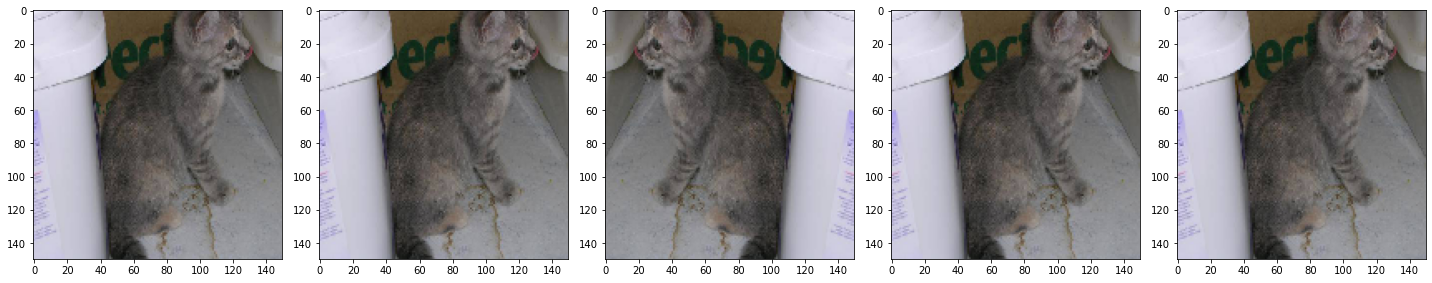

In [9]:
#printing the images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

# Rotating the image
The rotation augmentation will randomly rotate the image up to a specified number of degrees. Here, we'll set it to 45.

In [10]:
images_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = images_gen.flow_from_directory(batch_size=BATCH_SIZE, directory = train_path, target_size = (150,150), shuffle=True)

Found 2000 images belonging to 2 classes.


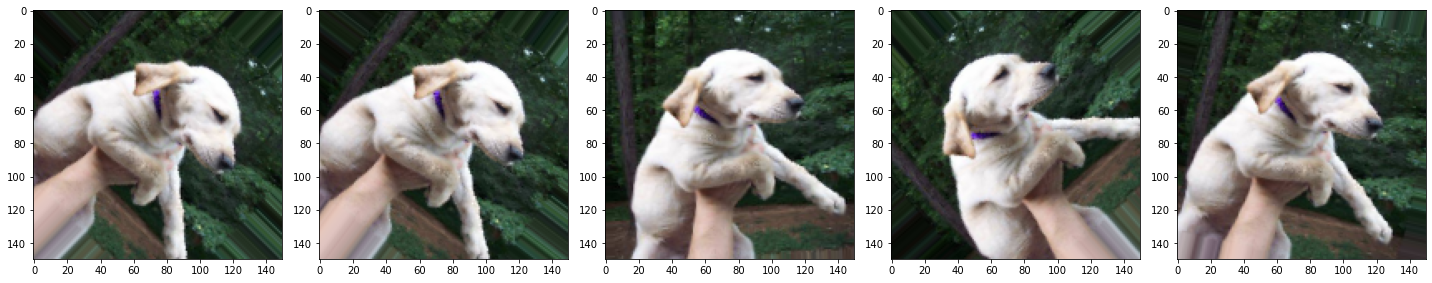

In [11]:
#printing the images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

# Applying Zoom
We can also apply Zoom augmentation to our dataset, zooming images up to 50% randomly.

In [12]:
images_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = images_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_path,
                                               shuffle=True,
                                               target_size=(IMG_SIZE, IMG_SIZE))


Found 2000 images belonging to 2 classes.


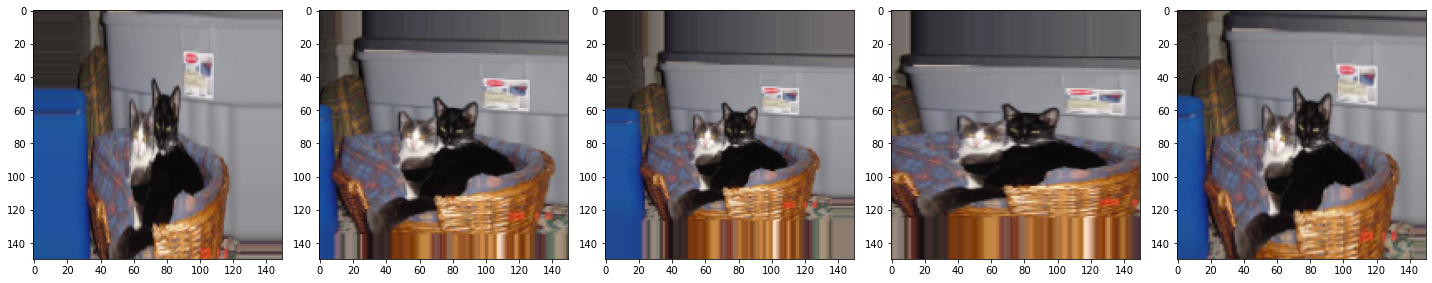

In [13]:
#printing the images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

# Putting it all together
We can apply all these augmentations, and even others, with just one line of code, by passing the augmentations as arguments with proper values.

Here, we have applied rescale, rotation of 45 degrees, width shift, height shift, horizontal flip, and zoom augmentation to our training images.

In [14]:
images_gen_train = ImageDataGenerator(rescale = 1./255.,rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.5, horizontal_flip=True, fill_mode="nearest")
train_data_gen = images_gen_train.flow_from_directory(batch_size=BATCH_SIZE, directory = train_path, shuffle=True, target_size=(150,150), class_mode="binary")

Found 2000 images belonging to 2 classes.


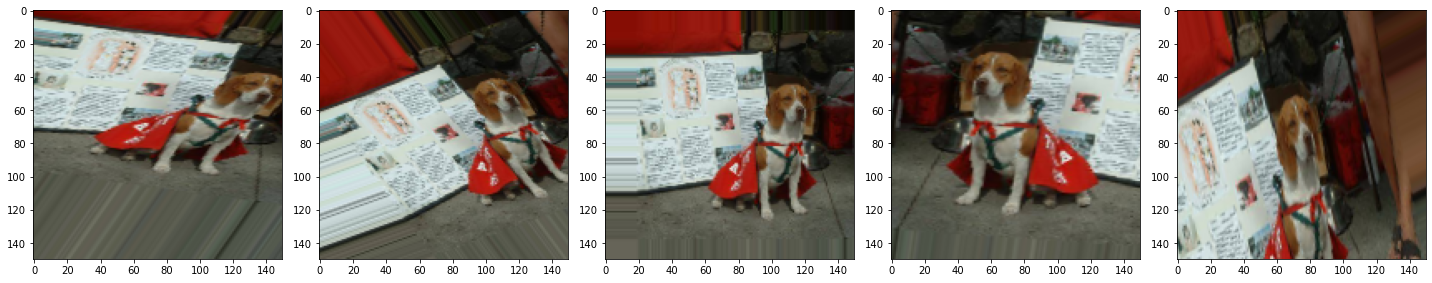

In [15]:
#Visualizing the images\
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

# Creating Validation Data generator
Generally, we only apply data augmentation to our training examples, since the original images should be representative of what our model needs to manage. So, in this case we are only rescaling our validation images and converting them into batches using ImageDataGenerator.



In [16]:
images_gen_val = ImageDataGenerator(rescale=(1./255))
val_data_gen = images_gen_val.flow_from_directory(batch_size=BATCH_SIZE, target_size=(150,150), directory = validation_path, class_mode="binary")

Found 1000 images belonging to 2 classes.


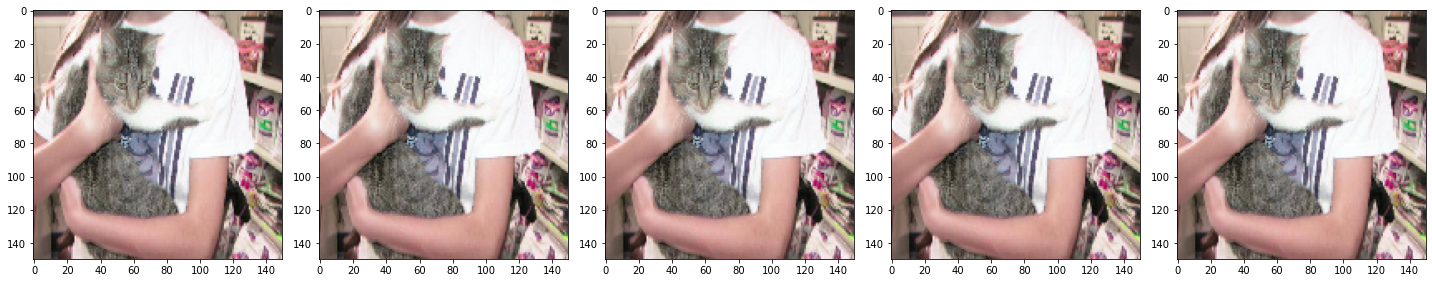

In [17]:
#Visualizing the images\
augmented_images = [val_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

# Create Model
The model consists of four convolution blocks with a max pool layer in each of them.

Before the final Dense layers, we're also applying a Dropout probability of 0.5. It means that 50% of the values coming into the Dropout layer will be set to zero. This helps to prevent overfitting.

Then we have a fully connected layer with 512 units, with a relu activation function. The model will output class probabilities for two classes — dogs and cats — using softmax.

In [18]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape=(150,150,3)))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same' activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Conv2D(128, (3,3), padding = 'same' activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 2))
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [19]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        3

In [20]:
#training the model
def train_model(model):
    history = model.fit_generator(train_data_gen,epochs=50,steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),validation_data=val_data_gen,validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))))
    return history
history = train_model(model)

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 [==============================] - 72s 4s/step - loss: 0.6955 - accuracy: 0.4890 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 70s 3s/step - loss: 0.6929 - accuracy: 0.5080 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/50
 5/20 [======>.......................] - ETA: 46s - loss: 0.6939 - accuracy: 0.4800

KeyboardInterrupt: 

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined